## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [5]:
# Checking the number of mice in the DataFrame.
unique_mice=mouse_df["Mouse ID"].unique()
total_mice=0
for mouse in unique_mice:
    total_mice+=1
print(f"There are {total_mice} mice in this dataset.")
print(f"There are {mouse_df.shape[0]} rows in this dataset.")

#also could possibly do len(unique_mice)

There are 249 mice in this dataset.
There are 1893 rows in this dataset.


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
extra_mouse=mouse_df[mouse_df.duplicated()]
extra_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse.
clean_mouse_df=mouse_df.drop_duplicates(keep="first")

In [9]:
# Checking the number of mice in the clean DataFrame.
unique_cleanmouse=clean_mouse_df["Mouse ID"].unique()
total_cleanmouse=0
for mouse in unique_cleanmouse:
    total_cleanmouse+=1
print(f"There are {total_cleanmouse} mice in this dataset.")
print(f"There are {clean_mouse_df.shape[0]} rows in this dataset.")

There are 249 mice in this dataset.
There are 1892 rows in this dataset.


In [10]:
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [11]:
#Note: I talked to Andrew about my homework and he showed me the alternative (probably better) ways to solve this problem. 
# I'll show all three of them here so that I'm not plagarizing his methods but I still get to practice them. Below is the
#first way I solved the problem, and the next two cells are his methods.

#METHOD 1: LOOP THROUGH THE DATA AND BUILD A DATAFRAME

drug_means=[]
drug_medians=[]
drug_modes=[]
drug_sds=[]
drug_SEMs=[]

#----get the drugs
drugs=clean_mouse_df["Drug Regimen"].unique()

#----loop through the data and populate a list of summary statistics for each drug
for drug in drugs:
    drug_means.append (np.mean((clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]))), #means
    drug_medians.append(np.median((clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]))) #medians
    drug_modes.append(st.mode((clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]))[0]) #modes
    drug_sds.append((clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]).std()) #sds
    drug_SEMs.append((clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]).sem())
  

In [12]:
drug_summary_stats =pd.DataFrame({
    "Drug":(drug for drug in drugs),
    "Mean":[value for value in drug_means],
    "Median":[value for value in drug_medians],
    "Mode":[value for value in drug_medians],
    "Standard Deviation":[value for value in drug_sds],
    "Variance":[value**2 for value in drug_sds],
    "SEM ":[value for value in drug_SEMs]})

In [13]:
drug_summary_stats

,Drug,Mean,Median,Mode,Standard Deviation,Variance,SEM
0,Ramicane,40.216745,40.673236,40.673236,4.846308,23.486704,0.320955
1,Capomulin,40.675741,41.557809,41.557809,4.994774,24.947764,0.329346
2,Infubinol,52.884795,51.820584,51.820584,6.567243,43.128684,0.492236
3,Placebo,54.033581,52.288934,52.288934,7.821003,61.168083,0.581331
4,Ceftamin,52.591172,51.776157,51.776157,6.268188,39.290177,0.469821
5,Stelasyn,54.233149,52.431737,52.431737,7.710419,59.450562,0.573111
6,Zoniferol,53.236507,51.818479,51.818479,6.966589,48.533355,0.516398
7,Ketapril,55.235638,53.698743,53.698743,8.279709,68.553577,0.603860
8,Propriva,52.368318,50.909965,50.909965,6.502160,42.278090,0.514041
9,Naftisol,54.331565,52.509285,52.509285,8.134708,66.173479,0.596466


In [14]:
#Get summary statistics using the groupby method:
#Note: I didn't get the mode to work using this method. I'm sure that I could, but I wanted to continue on with the assignment.
#without further delay.

grouped=clean_mouse_df.groupby(["Drug Regimen"])
means=grouped.mean()["Tumor Volume (mm3)"]
median=grouped.median()["Tumor Volume (mm3)"]
standard_dev=grouped.std()["Tumor Volume (mm3)"]
sem=grouped.sem()["Tumor Volume (mm3)"]
drug_summary_stats2 =pd.DataFrame({
    "Mean":(means),
    "Median":(median),
    "SD":(standard_dev),
    "VAR":(standard_dev**2),
    "SEM":(sem)})

In [15]:
drug_summary_stats2

,Mean,Median,SD,VAR,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.368318,50.909965,6.502160,42.278090,0.514041
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [16]:
# get summary statistics using the .agg method. This is basically the same code that Andrew showed me,
#but I still watned to practice it. To make up for code-napping I watched a video on how this works, if that helps? 
#I also still coudln't get the mode to work here, but wanted to move on.

drug_summary_stats3=grouped.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
drug_summary_stats3

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [17]:
#QUESTION FOR INSTRUCTOR!
# There has GOT to be a better way to make the charts than the method I chose. Please show me how to make this into one bar chart:
#still_alive=clean_mouse_df.groupby(["Drug Regimen", "Timepoint"]).count()["Mouse ID"]

In [18]:
still_alive=clean_mouse_df.groupby(["Drug Regimen", "Timepoint"]).count()
still_alive


Mouse ID  Sex  Age_months  Weight (g)  \
Drug Regimen Timepoint                                          
Capomulin    0                25   25          25          25   
             5                25   25          25          25   
             10               25   25          25          25   
             15               24   24          24          24   
             20               23   23          23          23   
...                          ...  ...         ...         ...   
Zoniferol    25               16   16          16          16   
             30               15   15          15          15   
             35               14   14          14          14   
             40               14   14          14          14   
             45               14   14          14          14   

                        Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen Timepoint                                        
Capomulin    0                          25                25  
             5                          25                25  
             10                         25                25  
             15                         24                24  
             20                         23                23  
...                                    ...               ...  
Zoniferol    25                         16                16  
             30                         15                15  
             35                         14                14  
             40                         14                14  
             45                         14                14  

[100 rows x 6 columns]

## Bar Plots

In [19]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#grouped_time=clean_mouse_df.groupby(["Drug Regimen","Timepoint"])
#grouped_time.count()
keys=[]
for i in range(0,100):
    keys.append(i)
still_alive=clean_mouse_df.groupby(["Drug Regimen", "Timepoint"]).count()["Mouse ID"]
final_alive = pd.DataFrame(still_alive)
final_alive["Index"]=keys
final_alive.set_index("Index", drop=True, append=True, inplace=False, verify_integrity=False)

drug1_alive=final_alive.loc[final_alive["Index"]<10]
capomulin.plot(kind="bar", figsize=(20,5))

xlocate=np.arange(len(drugs))

ylabel=np.arange(0,130,20)
#still_alive
#still_alive=clean_mouse_df.groupby(["Drug Regimen", "Timepoint"]).count()["Mouse ID"]
#still_alive.set_index=("Drug Regimen")
#livingplot=still_alive.plot(kind="bar", figsize=(20,5))
#livingplot.set_xticklabels(still_alive["Drug Regimen"], rotation=45)
#still_alive.set_index=["Drug Regimen"]
#final_alive = pd.DataFrame(still_alive)

NameError: name 'capomulin' is not defined

In [20]:
still_alive=clean_mouse_df.groupby(["Drug Regimen","Timepoint"]).count()
still_alive
timepoints=["0", "5","10","15","20","25","30","35","40","45"]
xlocation=np.arange(len(Timepoints))
ylocation=np.arange(0,130,10)
this= list(still_alive.T[drugs[0]])
this



    #"Living Mice":[still_alive.loc[still_alive[["Drug Regimen"]==drugs & ["Timepoint"]==this]] }) })
main_data

NameError: name 'Timepoints' is not defined

In [21]:
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [27]:
#THIS IS THE CELL THAT ACTUALLY WORKS START HERE
timepoints=["0", "5","10","15","20","25","30","35","40","45"]
still_alive=clean_mouse_df.groupby(["Drug Regimen","Timepoint"]).count()
new=still_alive.add_suffix('_Count').reset_index()

#Create a dataset for each drug separately
capomulin=imputed_df.loc[new["Drug Regimen"]=="Capomulin"]
ramicane=imputed_df.loc[new["Drug Regimen"]=="Ramicane"]
infubinol=imputed_df.loc[new["Drug Regimen"]=="Infubinol"]
placebo=imputed_df.loc[new["Drug Regimen"]=="Placebo"]
ceftamin=imputed_df.loc[new["Drug Regimen"]=="Ceftamin"]
stelasyn=imputed_df.loc[new["Drug Regimen"]=="Stelasyn"]
zoniferol=imputed_df.loc[new["Drug Regimen"]=="Zoniferol"]
ketapril=imputed_df.loc[new["Drug Regimen"]=="Ketapril"]

#Create equally spaced "frames" to put the bars in so that they are perfectly spaced out and touching.
#(this code is stolen: https://stackoverflow.com/questions/50797116/equally-spaced-elements-between-two-given-number)
#I know we aren't supposed to borrow code- does citing my source help? Also, isn't this code cool?

x = 0
y = 1
n = 12
step = (y - x) / (n - 1)

frames = [x + step * i for i in range(n)]
frame_width=frames[1]-frames[0]

#Plot
xpos=np.arange(len(timepoints))
plt.xticks(xpos,timepoints)
plt.bar(xpos+frames[0],capomulin["Mouse ID_Count"], label="Capomulin",width=(frame_width))
plt.bar(xpos+frames[1],ramicane["Mouse ID_Count"], label="Ramicane", width=(frame_width))
plt.bar(xpos+frames[2],infubinol["Mouse ID_Count"], label="Infubinol", width=(frame_width))
plt.bar(xpos+frames[3],placebo["Mouse ID_Count"], label="Placebo", width=(frame_width))
plt.bar(xpos+frames[4],ceftamin["Mouse ID_Count"], label="Ceftamin", width=(frame_width))
plt.bar(xpos+frames[5],stelasyn["Mouse ID_Count"], label="Stelasyn", width=(frame_width))
plt.bar(xpos+frames[6],zoniferol["Mouse ID_Count"], label="Zoniferol", width=(frame_width))
plt.bar(xpos+frames[7],ketapril["Mouse ID_Count"], label="Ketapril", width=(frame_width))

#plt.xlabel("Time Point")
plt.ylabel("Living Mice")
plt.legend()
plt.rcParams["figure.figsize"] = [20,5]

NameError: name 'imputed_df' is not defined

In [28]:
type(new["Timepoint"].loc[new["Timepoints"==1]])

KeyError: False

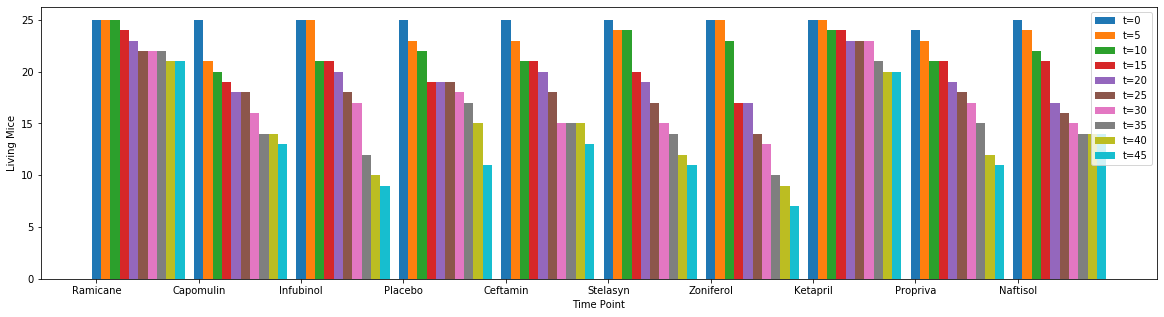

In [48]:
#I recognize that I WAY overpuzzled this puzzle, but I started on it before the output file was released based on the original
#wording of the problem. Even then, I sorta knew I was overdoing it and should have asked, but once I got started,
#I got obsessed with obtaining my solution. I also strongly suspect that this problem could have been solved with 
#one groupby dataset by Drug and Timepoint without dicing it up, but I just coudln't figure it out so I split it up.


#Create equally spaced "frames" to put the bars in so that they are perfectly spaced out and touching.
#(this code is stolen: https://stackoverflow.com/questions/50797116/equally-spaced-elements-between-two-given-number)
#I know we aren't supposed to borrow code- does citing my source help? Also, isn't this code cool?
x = 0
y = 1
n = 12
step = (y - x) / (n - 1)

frames = [x + step * i for i in range(n)]
frame_width=frames[1]-frames[0]

timepoints=[0, 5,10,15,20,25,30,35,40,45]
still_alive=clean_mouse_df.groupby(["Drug Regimen","Timepoint"]).count()
new=still_alive.add_suffix('_Count').reset_index()

#Create a dataset for each drug separately
tzero=new.loc[new["Timepoint"]==timepoints[0]]
tfive=new.loc[new["Timepoint"]==timepoints[1]]
tten=new.loc[new["Timepoint"]==timepoints[2]]
tfifteen=new.loc[new["Timepoint"]==timepoints[3]]
ttwenty=new.loc[new["Timepoint"]==timepoints[4]]
ttwentyfive=new.loc[new["Timepoint"]==timepoints[5]]
tthirty=new.loc[new["Timepoint"]==timepoints[6]]
tthirtyfive=new.loc[new["Timepoint"]==timepoints[7]]
tfourty=new.loc[new["Timepoint"]==timepoints[8]]
tfourtyfive=new.loc[new["Timepoint"]==timepoints[9]]

#Plot Drugs

xpos=np.arange(len(drugs))
plt.xticks(xpos,drugs)
plt.bar(xpos+frames[0],tzero["Mouse ID_Count"], label="t=0",width=(frame_width))
plt.bar(xpos+frames[1],tfive["Mouse ID_Count"], label="t=5",width=(frame_width))
plt.bar(xpos+frames[2],tten["Mouse ID_Count"], label="t=10",width=(frame_width))
plt.bar(xpos+frames[3],tfifteen["Mouse ID_Count"], label="t=15",width=(frame_width))
plt.bar(xpos+frames[4],ttwenty["Mouse ID_Count"], label="t=20",width=(frame_width))
plt.bar(xpos+frames[5],ttwentyfive["Mouse ID_Count"], label="t=25",width=(frame_width))
plt.bar(xpos+frames[6],tthirty["Mouse ID_Count"], label="t=30",width=(frame_width))
plt.bar(xpos+frames[7],tthirtyfive["Mouse ID_Count"], label="t=35",width=(frame_width))
plt.bar(xpos+frames[8],tfourty["Mouse ID_Count"], label="t=40",width=(frame_width))
plt.bar(xpos+frames[9],tfourtyfive["Mouse ID_Count"], label="t=45",width=(frame_width))


plt.xlabel("Time Point")
plt.ylabel("Living Mice")
plt.legend()
plt.rcParams["figure.figsize"] = [20,5]
plt.savefig("Plots/survival_by_drug_over_time.png")

In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

## Pie Plots

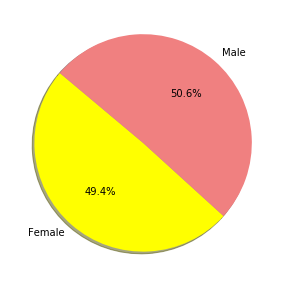

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
piesizes = [value for value in clean_mouse_df.groupby(["Sex"]).count()["Mouse ID"]]
pielabels=["Female", "Male"]
colors=["yellow", "lightcoral"]
plt.pie(piesizes, labels=pielabels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("Plots/mice_sex")


In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
